In [1]:
import sys


!{sys.executable} -m pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 22.3 MB 31.7 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 144.8 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=eef62a00e4335f6d7b764286584a4830cfe60f664b46e42fe86a938eac41ed5e
  Stored in directory: /home/emr-notebook/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
!{sys.executable} -m pip install networkx

Defaulting to user installation because normal site-packages is not writeable


In [3]:

#import packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans
import datetime

#import data
Products = pd.read_csv('s3://kevinr/Product.csv')

EndUser = pd.read_csv('s3://kevinr/EndUser.csv')

Invoice = pd.read_csv('s3://kevinr/Invoice.csv')

Vendor = pd.read_csv('s3://kevinr/Vendor.csv')

In [4]:
Invoice["INVOICE_DATE"] = pd.to_datetime(Invoice["INVOICE_DATE"])

In [5]:
filt = (Invoice['INVOICE_DATE'] >= '8/01/2020') 
Invoice1 = Invoice.loc[filt]
Invoice1

,COUNTRY_CODE,INVOICE_DATE,INVOICE_ID,INVOICE_LINE,PRODUCT_ID,UNITE_PRICE_$,QUANTITY_ORDERED,END_USER_ID
6,UK,2020-08-17,9D26B5344AB4912620E779195FE2F79B,1,9DF9690DE95469FB8087AA90862E70B8,373.507184,1,6DE483BFB7D5EEDFD2FFC1B6F3F990AA
25,UK,2020-09-04,1535742125BB364E3D90FDE50FD5E7AB,2,F5EABD46A5C5C6D931F1C64FA2475DAE,39.255520,10,348552EDFF87F5A0D17135B9D0CF3F8A
32,UK,2020-09-10,3377B9F005A01047F2EC78BF2471E9D0,1,98B1DC8FF32544C25B8BE7BD3F152DB5,21.135600,4,0F58D5A5515F1A8A9D179AA58858B67B
54,UK,2020-08-26,0B4D661132C45A5B94D4197AA276B906,15,6AEC6ED90BEADE99AA0D6990182468DB,119.459244,2,0F58D5A5515F1A8A9D179AA58858B67B
55,UK,2020-08-27,759F98E23657D6B9C124F756C749AB64,1,5A48688B6DF9141BFD5DEE321E400D6D,182.020015,2,0DF9912E0B03F1B29912720999323F3C
...,...,...,...,...,...,...,...,...
1135307,UK,2020-08-25,066E31F565ECA094064CD615BA85BC62,1,CC30D56C5AB55768C2ADD0A0DCBEA08F,411.194234,2,5A5392F123B05EC2FF3F93C499E7C64E
1135308,UK,2020-09-09,13853B835A6BC8ACCD6D8F00FC5F0498,1,6A965D3182C0B73FC4C11A175DC3EBB4,2324.788584,5,A6309900BC7DAB5A34A2EAB45377CE20
1135311,UK,2020-08-10,3ABC2F8C1A2815A07EA3E5F0CB1FE540,1,8A8C10A2DBD16C60484F20F67A187E0F,20.837079,1,D19A2C269E6B96815C92EC97AAA4A5E8
1135317,UK,2020-08-27,D77490359A743E75C074E56251C6ED0D,1,F350F8542CF45EBA0406F08EFAD66499,11.452203,3,4E314F9C7AB151564158690510C3AABF


In [6]:
filt2 = (Invoice['INVOICE_DATE'] < '8/01/2020')
Invoice2 = Invoice.loc[filt2]
Invoice2

,COUNTRY_CODE,INVOICE_DATE,INVOICE_ID,INVOICE_LINE,PRODUCT_ID,UNITE_PRICE_$,QUANTITY_ORDERED,END_USER_ID
0,UK,2019-07-15,E5ED03155812D08AF95C0DE6C6CFC756,1,74B2CFB8460D047F00CEC531319C7768,3285.863338,6,68D292A10256DB24405C56738F34D976
1,UK,2019-06-06,060AFA0DDB5F61AE58689DE4E1C45F66,1,9A5264F9ED8507F6F31112E24917452D,418.152176,1,4B39A21A1DD7881D4E165B9E90A4B831
2,UK,2019-04-04,95F78CBA7E223D0441DBE5EC9139C534,1,42A3AE06A8DC14FF62FDA90A55292CAA,60.578612,1,BE572735EA42E603C64667A191FAB9F6
3,UK,2019-02-20,14104E4FCCE6B2BF8A3CC8321DC1B5AE,1,F5B5DB9152AEE5BC633DEF60AC30203D,69.704712,6,E781130707853D0407533FC5433CF0BB
4,UK,2019-11-07,1176EAEA7C94F29A0335D9A5EE9D2A0D,1,59343B86E5B56460844F92C4A87ED4D1,566.165348,1,B9B2476B6EBE1C6657CACC1C836BDF6C
...,...,...,...,...,...,...,...,...
1135330,UK,2020-05-21,DAFB3D65054E0D78E303D2E269A4B52C,1,3D160510AF4A24A1BBABDE5CE9865B9A,245.163843,1,8E5AB7C93333C5EEBC8597F3DFA54C08
1135331,UK,2020-04-15,767B314B46D41E34CAB3A78B6729DC2F,1,78696A5B8A3FD20F837FCE6D079409BF,1279.541497,2,289CEEF05EDEB05B2D6FB02D7C20B6D5
1135332,UK,2019-01-10,00DD1AD939D99A27ED1499DFF3550A6D,3,04B44C0CAF14ADC0111482DB4B811742,137.463653,1,21D8D12F4734DE2AC042C99C0ED66C74
1135333,UK,2019-01-11,B8023E9C824731DA8640E9B101CDCD78,4,243B4C9A6C60516C55232D3D21F23C5E,299.060463,5,42E0E9A051C0225F09476491AD02B296


In [7]:
#data

I = Invoice.groupby('END_USER_ID')['UNITE_PRICE_$'].apply(sum)
J = pd.DataFrame({'END_USER_ID':I.index, 'TOTAL_SPENT':I.values})
Invoice = pd.merge(Invoice, J,on='END_USER_ID')

data = pd.merge(Products, Vendor,on='VENDOR_ID')
data = pd.merge(data, Invoice,on='PRODUCT_ID')
data = pd.merge(data, EndUser,on='END_USER_ID')
data


,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,TOTAL_SPENT,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.624759e+01,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013
1127006,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.637152e+01,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0
1127007,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1.853544e+03,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004
1127008,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.607494e+01,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007


In [8]:
data.columns

Index(['Unnamed: 0_x', 'COUNTRY_CODE_x', 'PRODUCT_ID', 'PRODUCT_DECS',
       'PRODUCT_CAT', 'PRODUCT_SUBCAT', 'VENDOR_ID', 'Unnamed: 0_y',
       'COUNTRY_CODE_y', 'VENDOR_NAME', 'VENDOR_CAT', 'VENDOR_SUBCAT',
       'COUNTRY_CODE_x', 'INVOICE_DATE', 'INVOICE_ID', 'INVOICE_LINE',
       'UNITE_PRICE_$', 'QUANTITY_ORDERED', 'END_USER_ID', 'TOTAL_SPENT',
       'Unnamed: 0', 'COUNTRY_CODE_y', 'STATE', 'Business_CAT_LEVEL_1',
       'Business_CAT_LEVEL_2', 'Business_CAT_LEVEL_3', 'EMPLOYEES_BIN',
       'ANNUAL_SALES', 'YEAR_STARTED'],
      dtype='object')

In [9]:
data1 = data

In [10]:
data = data[filt2]
data

/emr/notebook-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,TOTAL_SPENT,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.624759e+01,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013
1127006,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.637152e+01,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0
1127007,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1.853544e+03,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004
1127008,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.607494e+01,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007


In [11]:
data2 = data1[filt]
data2

/emr/notebook-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,TOTAL_SPENT,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED
6,1304,UK,A2B2E30E501E1496571E1D8059E563F0,ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
25,11140,UK,E90B2F19684A19666DA5BB630983F46B,BACKPACK ECO LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
32,11499,UK,6AF8EEDDA0239896AE1A181434388AE8,SPIN BACKPACK LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
54,14883,UK,A14765FDCAC0CFE660AE7E7DDA9E6DD0,ULTRASKINPRO LAPTOP SLEEVE 12.5 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
55,14883,UK,A14765FDCAC0CFE660AE7E7DDA9E6DD0,ULTRASKINPRO LAPTOP SLEEVE 12.5 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126950,26555,UK,A88DB8BD2D946F12504B0EEEC417B580,FAX-2840 LASER FAX/COPIER EN,PRINTER/COPIER/FAX,FAX LASER,BE2D84CF649E04241872CEC01F0DA9E5,711,UK,BROTHER,...,2.226781e+02,28855,UK,WEST SUSSEX,Retail Trade,Miscellaneous Retail,Drug Stores And Proprietary Stores,<20,552501.0,2012
1126966,27244,UK,FAEA652831B7801BEF59703A8E0B9E5A,FAX-2940 LASER FAX/COPIER EN,PRINTER/COPIER/FAX,FAX LASER,BE2D84CF649E04241872CEC01F0DA9E5,711,UK,BROTHER,...,2.742557e+02,27820,UK,ESSEX,Retail Trade,"Building Materials, Hardware, Garden Supply, A...",Hardware Stores,<20,253817.0,2016
1126979,28367,UK,BB7E51B1C7C1B22AB545ED2EF816D9F7,56K PCIE CARD FAXMODEM LOW+FULL HEIGHT BRACKET...,COMMUN/NETWORKING,MODEM/NIC COMBO,A2BBD597322ABBA70E4E587A84BEE7C4,139,UK,USROBOTICS,...,2.273917e+01,41,UK,ESSEX,Services,"Automotive Repair, Services, And Parking","Automotive Rental And Leasing, Without Drivers",<20,33689.0,2019
1126981,28367,UK,BB7E51B1C7C1B22AB545ED2EF816D9F7,56K PCIE CARD FAXMODEM LOW+FULL HEIGHT BRACKET...,COMMUN/NETWORKING,MODEM/NIC COMBO,A2BBD597322ABBA70E4E587A84BEE7C4,139,UK,USROBOTICS,...,2.331598e+01,12358,UK,SURREY,"Finance, Insurance, And Real Estate",Real Estate,Real Estate Agents And Managers,<20,621067.0,2016


In [12]:
#bin annual sales
pd.qcut(data['ANNUAL_SALES'], q=3)

0          (73749783.0, 278397000000.0]
1          (73749783.0, 278397000000.0]
2          (73749783.0, 278397000000.0]
3          (73749783.0, 278397000000.0]
4          (73749783.0, 278397000000.0]
                       ...             
1127005              (0.999, 2111571.0]
1127006                             NaN
1127007                             NaN
1127008              (0.999, 2111571.0]
1127009              (0.999, 2111571.0]
Name: ANNUAL_SALES, Length: 1057764, dtype: category
Categories (3, interval[float64]): [(0.999, 2111571.0] < (2111571.0, 73749783.0] < (73749783.0, 278397000000.0]]

In [13]:
data['total_spent_bin'] = pd.qcut(data['TOTAL_SPENT'], q=3)
data['Annual_Sales_bin'] = pd.qcut(data['ANNUAL_SALES'], q=3)

/emr/notebook-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/emr/notebook-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
d2= data.drop_duplicates(subset = ['PRODUCT_ID','END_USER_ID'], keep = 'last')

In [15]:
d7= data.drop_duplicates(subset = ['PRODUCT_ID','END_USER_ID'], keep = 'last')
productsPerUser2 = d7.groupby('END_USER_ID')['PRODUCT_ID'].apply(list)
PPU2 = pd.DataFrame({'END_USER_ID':productsPerUser2.index, 'Products':productsPerUser2.values})
PPU2

,END_USER_ID,Products
0,000132B479F0F56A47249E8093C7C180,[D6E579C0D0EFA6C5405370CE1FB0D3F9]
1,00017609D0C74E6CE907CFF9111F412E,[CE291FDC88ED34CE85AE2B7D9788CB50]
2,0001CCEEC0E80598BB94ACC3247E7710,"[950564EBBBD448E0C3ACE0B1DDEE72CE, EB1F0052603..."
3,000242D514CE9634091A121F64F972FB,"[CA12E9CD8273215CF1AB049DA2A1059F, DB9BCE4AC01..."
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[08CFE495D892BF022C6301BAD41DEA20, D075CB4D4A1..."
...,...,...
143220,FFFEAEB6AADD794DF0A99CD82E0289FB,[595CAAD82A96B4503DD83350025BB9FD]
143221,FFFEB6ACEABBA3F95BB5DE57828412DF,[FFB433CAF9AD532AFAFD4D772C0E8BD2]
143222,FFFF75E2F481CE59842E7139776CAAAD,[243492F4AEA4B5F0CA699E5F3E349A50]
143223,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[92FF572DF06ADB5A20ED3E742610EAB9, 8BB932FC0CC..."


In [16]:
d4= data.drop_duplicates(subset = ['VENDOR_ID','END_USER_ID'], keep = 'last')

In [17]:
## get a list of all users and the products they purchased
productsPerUser = d2.groupby('END_USER_ID')['PRODUCT_ID'].apply(list)
PPU = pd.DataFrame({'END_USER_ID':productsPerUser.index, 'Products':productsPerUser.values})
PPU

,END_USER_ID,Products
0,000132B479F0F56A47249E8093C7C180,[D6E579C0D0EFA6C5405370CE1FB0D3F9]
1,00017609D0C74E6CE907CFF9111F412E,[CE291FDC88ED34CE85AE2B7D9788CB50]
2,0001CCEEC0E80598BB94ACC3247E7710,"[950564EBBBD448E0C3ACE0B1DDEE72CE, EB1F0052603..."
3,000242D514CE9634091A121F64F972FB,"[CA12E9CD8273215CF1AB049DA2A1059F, DB9BCE4AC01..."
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[08CFE495D892BF022C6301BAD41DEA20, D075CB4D4A1..."
...,...,...
143220,FFFEAEB6AADD794DF0A99CD82E0289FB,[595CAAD82A96B4503DD83350025BB9FD]
143221,FFFEB6ACEABBA3F95BB5DE57828412DF,[FFB433CAF9AD532AFAFD4D772C0E8BD2]
143222,FFFF75E2F481CE59842E7139776CAAAD,[243492F4AEA4B5F0CA699E5F3E349A50]
143223,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[92FF572DF06ADB5A20ED3E742610EAB9, 8BB932FC0CC..."


In [18]:
VendorPerUser = d4.groupby("END_USER_ID")["VENDOR_ID"].apply(list)
VPU= pd.DataFrame({'END_USER_ID':VendorPerUser.index, 'Vendor':VendorPerUser.values})
VPU

,END_USER_ID,Vendor
0,000132B479F0F56A47249E8093C7C180,[7ED5AB2BFA4C55BD87D00B17B4A4D970]
1,00017609D0C74E6CE907CFF9111F412E,[C76DA52B2FCE23F1949FAAC059A27E44]
2,0001CCEEC0E80598BB94ACC3247E7710,"[A4190183C76E071BEE5E74B2629C637F, 368A7CB85E9..."
3,000242D514CE9634091A121F64F972FB,[ADFBBD3C396430AD163CC304E95FE5A7]
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[ADFBBD3C396430AD163CC304E95FE5A7, F2385A685B2..."
...,...,...
143220,FFFEAEB6AADD794DF0A99CD82E0289FB,[300D8636ADA68AAA8F7D2494D70BC330]
143221,FFFEB6ACEABBA3F95BB5DE57828412DF,[11CA995A4746A5BB9A6C08B284DC8DA0]
143222,FFFF75E2F481CE59842E7139776CAAAD,[300D8636ADA68AAA8F7D2494D70BC330]
143223,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[81D15DF54B2371844A5F42485E6B4C33, 6B6A40374A4..."


In [19]:
d3 = data[['END_USER_ID','total_spent_bin']].drop_duplicates(subset = ['END_USER_ID','total_spent_bin'])
d3

,END_USER_ID,total_spent_bin
0,0DF9912E0B03F1B29912720999323F3C,"(709053.885, 48269844.737]"
15892,A0FDB4C93FD46033CC782AA1DD83D78E,"(709053.885, 48269844.737]"
23333,4FD0E289560F5AF8CDF2664A68FDAF12,"(709053.885, 48269844.737]"
26010,FBEFFA3FE060AF057CEA1574CD25DF20,"(7284.522, 709053.885]"
26236,D35367187F19EF4EEB3677869177E469,"(7284.522, 709053.885]"
...,...,...
1127005,B1F5EFF9FF2A89EE6932BBC293D2E7AB,"(9.001000000000001, 7284.522]"
1127006,53F5AA6A5F01D9362137FA674BA9AF8C,"(9.001000000000001, 7284.522]"
1127007,107FE731E5F1ECD71AFEEA7317FC1106,"(9.001000000000001, 7284.522]"
1127008,4C22DB3BC32A03A66C6690A7F08DA42E,"(9.001000000000001, 7284.522]"


In [20]:

#frames = [PPU, VPU, SPU]

result = pd.merge(PPU, VPU, on='END_USER_ID')
#result = pd.merge(result, SPU, on='END_USER_ID')
result = pd.merge(result, EndUser, on='END_USER_ID')

result['Annual_Sales_bin'] = pd.qcut(result['ANNUAL_SALES'], q=3)

result = pd.merge(result, d3, on='END_USER_ID')
result

,END_USER_ID,Products,Vendor,Unnamed: 0,COUNTRY_CODE,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Annual_Sales_bin,total_spent_bin
0,000132B479F0F56A47249E8093C7C180,[D6E579C0D0EFA6C5405370CE1FB0D3F9],[7ED5AB2BFA4C55BD87D00B17B4A4D970],65309,UK,NaN,Services,Legal Services,Legal Services,<20,188958.0,2019,"(0.999, 238447.0]","(9.001000000000001, 7284.522]"
1,00017609D0C74E6CE907CFF9111F412E,[CE291FDC88ED34CE85AE2B7D9788CB50],[C76DA52B2FCE23F1949FAAC059A27E44],12548,UK,BELFAST,Wholesale Trade,Wholesale Trade-durable Goods,"Machinery, Equipment, And Supplies",<20,1287474.0,2000,"(238447.0, 2312815.333]","(9.001000000000001, 7284.522]"
2,0001CCEEC0E80598BB94ACC3247E7710,"[950564EBBBD448E0C3ACE0B1DDEE72CE, EB1F0052603...","[A4190183C76E071BEE5E74B2629C637F, 368A7CB85E9...",92729,UK,DERBYSHIRE,Retail Trade,Miscellaneous Retail,"Retail Stores, Not Elsewhere Classified",UNKNOWN,154042987.0,2004,"(2312815.333, 278397000000.0]","(9.001000000000001, 7284.522]"
3,000242D514CE9634091A121F64F972FB,"[CA12E9CD8273215CF1AB049DA2A1059F, DB9BCE4AC01...",[ADFBBD3C396430AD163CC304E95FE5A7],68297,UK,CHESHIRE,Retail Trade,Miscellaneous Retail,Nonstore Retailers,<20,52419.0,2012,"(0.999, 238447.0]","(9.001000000000001, 7284.522]"
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[08CFE495D892BF022C6301BAD41DEA20, D075CB4D4A1...","[ADFBBD3C396430AD163CC304E95FE5A7, F2385A685B2...",86623,UK,SURREY,Services,Legal Services,Legal Services,<20,58147.0,2014,"(0.999, 238447.0]","(9.001000000000001, 7284.522]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143220,FFFEAEB6AADD794DF0A99CD82E0289FB,[595CAAD82A96B4503DD83350025BB9FD],[300D8636ADA68AAA8F7D2494D70BC330],95470,UK,KENT,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,263993.0,1991,"(238447.0, 2312815.333]","(9.001000000000001, 7284.522]"
143221,FFFEB6ACEABBA3F95BB5DE57828412DF,[FFB433CAF9AD532AFAFD4D772C0E8BD2],[11CA995A4746A5BB9A6C08B284DC8DA0],125925,UK,WEST YORKSHIRE,Services,Social Services,Individual And Family Social Services,100-249,4954109.0,2008,"(2312815.333, 278397000000.0]","(9.001000000000001, 7284.522]"
143222,FFFF75E2F481CE59842E7139776CAAAD,[243492F4AEA4B5F0CA699E5F3E349A50],[300D8636ADA68AAA8F7D2494D70BC330],44297,UK,HAMPSHIRE,Public Administration,Nonclassifiable Establishments,Nonclassifiable Establishments,UNKNOWN,NaN,2014,NaN,"(9.001000000000001, 7284.522]"
143223,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[92FF572DF06ADB5A20ED3E742610EAB9, 8BB932FC0CC...","[81D15DF54B2371844A5F42485E6B4C33, 6B6A40374A4...",45595,UK,HERTFORDSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",<20,203046.0,2018,"(0.999, 238447.0]","(9.001000000000001, 7284.522]"


In [21]:
#result[result.END_USER_ID == '0002A1EF533B2E30C136BD9E0B3C7F90']

In [22]:
#split
#def narrow(userID):
#    m = result[result.END_USER_ID == userID]["total_spent_bin"]
#    print(m)

In [23]:
#narrow("3062445D06E69CED2A2EEF8E35169B88")

In [24]:
#replace with empty list
#result.Products[4][1] = [str(j).replace(j," ") for j in result.Products[4] if j == 'D075CB4D4A17EF5FADE27790BC19A5D9']

In [26]:
#this will take a long time to run
#result1 = result
#for i, row in result1.iterrows():
#    if row['END_USER_ID'] in sample:
#        result1.at[i,'Products']= 0
#        print(i)
#result1


In [27]:
#!{sys.executable} -m pip install networkx

In [25]:
import networkx as nx
import time

# Load the graph by adding nodes and edges

G = nx.Graph(label="END_USER_ID")
start_time = time.time()
for i, rowi in result.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    #G.add_node(rowi['name'],key=rowi['id'],label="name",mtype=rowi['category'],rating=rowi['rating'])
    element1 = rowi['END_USER_ID']
    G.add_node(element1,label="USER")
    G.add_edge(rowi['END_USER_ID'], element1, label="USER")
        
    element2 = rowi['STATE']
    G.add_node(element2,label="STATE")
    G.add_edge(rowi['END_USER_ID'], element2, label="STATE")
    
    element3 = rowi['Business_CAT_LEVEL_1']
    G.add_node(element3,label="CATL1")
    G.add_edge(rowi['END_USER_ID'], element3, label="CATL1")
    
    element4 = rowi['Business_CAT_LEVEL_2']
    G.add_node(element4,label="CATL2")
    G.add_edge(rowi['END_USER_ID'], element4, label="CATL2")
    
    element5 = rowi['Business_CAT_LEVEL_3']
    G.add_node(element5,label="CATL3")
    G.add_edge(rowi['END_USER_ID'], element5, label="CATL3")
    
    element6 = rowi['EMPLOYEES_BIN']
    G.add_node(element6,label="BIN")
    G.add_edge(rowi['END_USER_ID'], element6, label="BIN")
    
    element7 = rowi['total_spent_bin']
    G.add_node(element7,label="TOTAL")
    G.add_edge(rowi['END_USER_ID'], element7, label="TOTAL")
    
    element8 = rowi['Products']
    if element8 != 0:
        for j in element8:
            G.add_node(j,label="PRODUCT")
            G.add_edge(rowi['END_USER_ID'], j, label="PRODUCT")
        
    element9 = rowi['Vendor']
    for k in element9:
        G.add_node(k,label="VENDOR")
        G.add_edge(rowi['END_USER_ID'], k, label="VENDOR")
        
    element10 = rowi['Annual_Sales_bin']
    G.add_node(element10,label="ANNUAL")
    G.add_edge(rowi['END_USER_ID'], element10, label="ANNUAL")
    
    
    #indices = find_similar(tfidf, i, top_n = 5)
    #snode="Sim("+rowi['END_USER_ID'][:15].strip()+")"        
    #G.add_node(snode,label="SIMILAR")
    #G.add_edge(rowi['END_USER_ID'], snode, label="SIMILARITY")
    #for element in indices:
    #    G.add_edge(snode, Products['END_USER_ID'].loc[element], label="SIMILARITY")
    

print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 0.40055084228515625 seconds --
 iter 1000 -- 0.7406578063964844 seconds --
 iter 2000 -- 0.8835256099700928 seconds --
 iter 3000 -- 1.0320417881011963 seconds --
 iter 4000 -- 1.171004295349121 seconds --
 iter 5000 -- 1.311138391494751 seconds --
 iter 6000 -- 1.4601964950561523 seconds --
 iter 7000 -- 1.6018166542053223 seconds --
 iter 8000 -- 1.759500503540039 seconds --
 iter 9000 -- 1.8979990482330322 seconds --
 iter 10000 -- 2.040478467941284 seconds --
 iter 11000 -- 2.202944278717041 seconds --
 iter 12000 -- 2.343998432159424 seconds --
 iter 13000 -- 2.4872236251831055 seconds --
 iter 14000 -- 2.628056287765503 seconds --
 iter 15000 -- 2.7872612476348877 seconds --
 iter 16000 -- 2.9672868251800537 seconds --
 iter 17000 -- 3.117149829864502 seconds --
 iter 18000 -- 3.2586722373962402 seconds --
 iter 19000 -- 3.4001681804656982 seconds --
 iter 20000 -- 3.5495221614837646 seconds --
 iter 21000 -- 3.693143367767334 seconds --
 iter 22000 -- 3.84065079689025

In [26]:
#Function to combine the edges and nodes for plotting
import matplotlib.pyplot as plt

def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
            sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="USER":
            colors.append('yellow')
        elif G.nodes[e]['label']=="STATE":
            colors.append('red')
        elif G.nodes[e]['label']=="CATL1":
            colors.append('green')
        elif G.nodes[e]['label']=="CATL2":
            colors.append('pink')
        elif G.nodes[e]['label']=="CATL3":
            colors.append('orange')
        elif G.nodes[e]['label']=="BIN":
            colors.append('purple')
        elif G.nodes[e]['label']=="TOTAL":
            colors.append('brown')
        elif G.nodes[e]['label']=="PRODUCT":
            colors.append('blue')
        elif G.nodes[e]['label']=="VENDOR":
            colors.append('black')
        elif G.nodes[e]['label']=="ANNUAL":
            colors.append('cyan')



            
    plt.figure(figsize = (25,20))
    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors, node_size=900)
    plt.show()

In [27]:
import math as math
#Function to calculate similiarity between 2 users
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="USER":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    USER=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        USER.append(key)
        weight.append(w)
    #ratings = list(np.float_(ratings))
    #recommendation = pd.Dataframe(data=np.array(weight),index=products)
    #recommendation = pd.DataFrame(data=np.array(weight),columns=["products","rating"])
    #recommendation.to_frame()
    d = {"Name": USER, "Closeness": weight}
    recommendation = pd.DataFrame(d)
    recommendation.sort_values(by= ["Closeness"], inplace=True,ascending=False)
    recommendation = recommendation.head(5)
    return recommendation;

In [28]:
#Close users search in PPU 
#Product Recommendation
def productRec(UserID, test):
    recommendation = get_recommendation(UserID)
    r = recommendation.Name.tolist()

    y = PPU[PPU['END_USER_ID'].isin(r)]

    v = y.Products.tolist()


    flat_list = []
    for i in v:
        for j in i:
            flat_list.append(j)

    k = flat_list

    freq = {}

    for items in flat_list:
        freq[items] = flat_list.count(items)

    #what they already bought
    y2 = PPU[PPU.END_USER_ID == UserID].Products.tolist()[0]

    ps = list(freq.keys())
    cs = list(freq.values())

    freqs = {"ProductID": ps, "Count": cs}
    rec = pd.DataFrame(freqs)
    rec.sort_values(by= ["Count"], inplace=True,ascending=False)

    bought= rec["ProductID"].isin(y2)
    
    #flag - pass 0 or 1 
    if test == 0:
        rec = rec[~bought]
    
        
    rec = rec.head(10)


    return rec

In [29]:
#Close users search in PPU 
#Product Recommendation
def productRec1(UserID, test):
    recommendation = get_recommendation(UserID)
    r = recommendation.Name.tolist()

    y = PPU[PPU['END_USER_ID'].isin(r)]

    v = y.Products.tolist()
    


    flat_list = []
    for i in v:
        for j in i:
            flat_list.append(j)

    k = flat_list
    
    #what they already bought
    y2 = PPU[PPU.END_USER_ID == UserID].Products.tolist()[0]
    
    #reccomend products of intrest to customers
    b = Products[Products.PRODUCT_ID.isin(y2)].PRODUCT_CAT.tolist()
    b2 = list(set(b))
    a = Products[Products.PRODUCT_ID.isin(k)]
    boolean_series = a.PRODUCT_CAT.isin(b2)
    a2 = a[boolean_series].PRODUCT_ID.tolist()

    freq = {}

    for items in a2:
        freq[items] = flat_list.count(items)


    ps = list(freq.keys())
    cs = list(freq.values())

    freqs = {"ProductID": ps, "Count": cs}
    rec = pd.DataFrame(freqs)
    rec.sort_values(by= ["Count"], inplace=True,ascending=False)

    bought= rec["ProductID"].isin(y2)
    
    #flag - pass 0 or 1 
    if test == 0:
        rec = rec[~bought]
    
        
    rec = rec.head(10)
    
   
    return rec

In [30]:
d8= data2.drop_duplicates(subset = ['PRODUCT_ID','END_USER_ID'], keep = 'last')
productsPerUser3 = d8.groupby('END_USER_ID')['PRODUCT_ID'].apply(list)
PPU3 = pd.DataFrame({'END_USER_ID':productsPerUser3.index, 'Products':productsPerUser3.values})
PPU3

,END_USER_ID,Products
0,000433AD0A5C5200FC4828902D5876AA,[D7CDC1C56F2F250E74A026520FE7AB02]
1,000BDFFC5A06943E4AA4F9D068E07798,[4DF7E1D4BDF580B9DE9F9B09BE2C7A5E]
2,000C70254F2B0313892943A22362F516,"[71793CAF2FC25FBC7EA2CA85405CB431, 2CAA8CD2880..."
3,000F03385A974FC38ADAA712EF9430F1,[547F75A08CFD4336E844377DEE1BD56B]
4,00121D9DC1594B630F251FBC1ED6FFAE,"[FE19CB0208FD0407D857B83F01BE69CC, D11D1D93622..."
...,...,...
24032,FFF272316C3FEA86B9DCA1240C3E7E2E,[3EC987AB87F9679908BAF2F1D75517FA]
24033,FFF398FBF03AFCB602CCC82CAB6A814C,[E31555276427F02D726B06387655A096]
24034,FFF523BEC90F4EB732D71590CBE24D76,[B1CF983093EA8583F27EF397DB7B0D13]
24035,FFF8F8AF49121E2FB86E6BB8DB7614BE,"[B5FF25EDA5C3FA051F1C9619D4250551, 119577A1E12..."


In [31]:
def getAccuracy(UserID):
    R = productRec1(UserID, 1)
    PPU4 = PPU3[PPU3.END_USER_ID == UserID].iloc[0]
    count = 0
    for i in R.ProductID:
        if i in (PPU4.Products):
            count +=1
    accuracy = count
    print('something')
    return accuracy

In [36]:
#PPU3 = PPU[PPU.END_USER_ID == '5FF24AF43D4A1B8367498FE3D09E2A0C'].iloc[0]
#PPU3.Products

In [37]:
#PPU3 = PPU2[PPU2.END_USER_ID == '5FF24AF43D4A1B8367498FE3D09E2A0C'].iloc[0]
#PPU3.Products

In [28]:
# test reccomendations based on users
#recommendation = get_recommendation("3062445D06E69CED2A2EEF8E35169B88")
#print("*"*40+"\n Recommendation for '3062445D06E69CED2A2EEF8E35169B88'\n"+"*"*40)
#print(recommendation)
recommendation2 = get_recommendation("5FF24AF43D4A1B8367498FE3D09E2A0C")
print("*"*40+"\n Recommendation for '5FF24AF43D4A1B8367498FE3D09E2A0C'\n"+"*"*40)
print(recommendation2)

****************************************
 Recommendation for '5FF24AF43D4A1B8367498FE3D09E2A0C'
****************************************
                                   Name  Closeness
16605  1B687BB46A12C38B38F7770CEADC72B7   3.235247
50665  F878953BF760EE4EF01ED600AE740AE8   2.825347
13932  0A52BD0BBF2E23F45BA665C6AFFE3DFB   2.813821
49767  F2CCC2975F1C9E69BA5B630675A3F9C0   2.810400
18611  289CEEF05EDEB05B2D6FB02D7C20B6D5   2.771113


In [41]:
productRec1('5FF24AF43D4A1B8367498FE3D09E2A0C', 0) #remove products cust already bought #
#1: keep products they alreayd bought

,ProductID,Count
0,CE60830A39C943FF5AFC15E744A31A27,5
4179,A85AF22E59CF30A5B2EE0FF2998F8A14,5
4642,04F47A26544E80E44EECACF1716304A4,5
4637,3A48EF6AA682E27494DC6A67621D76E6,5
4629,997E16CEA7E32F16455E4E38E2E85C22,5
4462,2C024F0044EA572AC2844CE2B6E03E84,5
4444,4ECAAD7811C96F7E4A3AF232DA2039A9,5
4411,00A1B92BDFD7F7D796AB9E6DC6AF057C,5
4249,94B4E0C412BFAA8E2A36BA0E9AB0527C,5
4215,2862B9DB5EC90EC8F1C72C314F3F25BB,5


In [32]:
data3 = data2
data3['freq'] = data3.groupby('END_USER_ID')['END_USER_ID'].transform('count')
data3 = data3[data3.freq > 10]
data3

/emr/notebook-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,freq
6,1304,UK,A2B2E30E501E1496571E1D8059E563F0,ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,952
25,11140,UK,E90B2F19684A19666DA5BB630983F46B,BACKPACK ECO LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,952
32,11499,UK,6AF8EEDDA0239896AE1A181434388AE8,SPIN BACKPACK LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,952
54,14883,UK,A14765FDCAC0CFE660AE7E7DDA9E6DD0,ULTRASKINPRO LAPTOP SLEEVE 12.5 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,952
55,14883,UK,A14765FDCAC0CFE660AE7E7DDA9E6DD0,ULTRASKINPRO LAPTOP SLEEVE 12.5 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083554,15686,UK,D840C8AC3F8A6BD9913E8E9D1CE41E68,HP E CARE PACK PSG DESKTOP 3Y NBD ONSITE DT D2...,COMPUTER SYSTEMS,SERVICE/WARRANTY,973C0639D5584399E4B4DC7EBB9D861C,342,UK,HP INC.,...,8576,UK,SOMERSET,Construction,Construction Special Trade Contractors,"Plumbing, Heating And Air-conditioning",<20,242272.0,2001,36
1083598,15686,UK,D840C8AC3F8A6BD9913E8E9D1CE41E68,HP E CARE PACK PSG DESKTOP 3Y NBD ONSITE DT D2...,COMPUTER SYSTEMS,SERVICE/WARRANTY,973C0639D5584399E4B4DC7EBB9D861C,342,UK,HP INC.,...,8576,UK,SOMERSET,Construction,Construction Special Trade Contractors,"Plumbing, Heating And Air-conditioning",<20,242272.0,2001,36
1083618,17286,UK,AF5CD2B16B97E84AF1B0B87D7A2FEDBD,EPACK3YR PICKUPRET NB ONLY F/ DEDICATED PERSON...,COMPUTER SYSTEMS,SERVICE/WARRANTY,973C0639D5584399E4B4DC7EBB9D861C,342,UK,HP INC.,...,8576,UK,SOMERSET,Construction,Construction Special Trade Contractors,"Plumbing, Heating And Air-conditioning",<20,242272.0,2001,36
1083619,17286,UK,AF5CD2B16B97E84AF1B0B87D7A2FEDBD,EPACK3YR PICKUPRET NB ONLY F/ DEDICATED PERSON...,COMPUTER SYSTEMS,SERVICE/WARRANTY,973C0639D5584399E4B4DC7EBB9D861C,342,UK,HP INC.,...,8576,UK,SOMERSET,Construction,Construction Special Trade Contractors,"Plumbing, Heating And Air-conditioning",<20,242272.0,2001,36


In [33]:
u1 = list(data.END_USER_ID.unique())
u2 = list(data3.END_USER_ID.unique())

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

test = list((intersection(u1, u2)))

test

['461E45002446F412A4AD51CD319BC5F3',
 '8E7DCF529BA2DE7A28708263EA45C692',
 '4FE9D5E091B4A7E039C0649EB16ACA37',
 '54836104F2B438B9914FA169AF74DE09',
 'D01367ED9CA47BF9A4AE029064A7A88C',
 '5860362EA626DE6275F59E9F9170F3D5',
 '51A435D4EB792B427CCA192EFE77FF03',
 'CD1DC7EBEF0CA50FA01881EC0897207A',
 '99794AA872A74AF1DEEB1D461D1988DA',
 '36B8376C09CCA7860E6307494772FEDD',
 'CB74B6A3201442439B3BDEC627F7E858',
 '43E57F1C4D7A0AA7F558AD5C5339F11F',
 '9139AC73D8BEAFEDAFFAF4CE22B8357E',
 '7194C562BDADD18DD54542E689A8F67D',
 'F8ED44FAEB4B9CB2FC8BCDA7352E6AEC',
 'BDACE6201F16DB3093EB23D81250147E',
 '8D1A068C644CAA658D6CF9868602C580',
 '74ECCE108330FEC916214C5CD8E7F473',
 'DEDD715ED0EDBDE6238F7D499397C20A',
 'C0D8C15E498E68C3B5929442B94BB463',
 '4FAF4B8033FF0FD3345C78C290526CA2',
 '44839C73F9C67EB4EE8221EBBE7A28FB',
 'F59E27218FDA1B18E277BC0917431AF5',
 'E3610C3A1AFE5F97A65154FA6F31C262',
 '00194EF24296CBD52A98CD6C465BE2AF',
 '84B91F1A0970F2208784B2BF40086DE7',
 '8F9EBA67F4E4EAF5A85C6F8D945AE84C',
 

In [34]:
len(test)

425

In [45]:
#u1 = list(data.END_USER_ID.unique())
#u2 = list(data2.END_USER_ID.unique())

#def intersection(lst1, lst2):
#    return list(set(lst1) & set(lst2))

#test = list((intersection(u1, u2)))

#test

In [35]:
data4 = data[data.END_USER_ID.isin(test)]
data4

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,total_spent_bin,Annual_Sales_bin
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,"(709053.885, 48269844.737]","(73749783.0, 278397000000.0]"
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,"(709053.885, 48269844.737]","(73749783.0, 278397000000.0]"
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,"(709053.885, 48269844.737]","(73749783.0, 278397000000.0]"
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,"(709053.885, 48269844.737]","(73749783.0, 278397000000.0]"
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,"(709053.885, 48269844.737]","(73749783.0, 278397000000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083642,31980,UK,7B08FC7CECED0D4039049D080677542F,EPACK 3YR NEXTBUSDAYONSITE NOTE F/ DEDICATED P...,COMPUTER SYSTEMS,SERVICE/WARRANTY,973C0639D5584399E4B4DC7EBB9D861C,342,UK,HP INC.,...,UK,SOMERSET,Construction,Construction Special Trade Contractors,"Plumbing, Heating And Air-conditioning",<20,242272.0,2001,"(7284.522, 709053.885]","(0.999, 2111571.0]"
1083643,31980,UK,7B08FC7CECED0D4039049D080677542F,EPACK 3YR NEXTBUSDAYONSITE NOTE F/ DEDICATED P...,COMPUTER SYSTEMS,SERVICE/WARRANTY,973C0639D5584399E4B4DC7EBB9D861C,342,UK,HP INC.,...,UK,SOMERSET,Construction,Construction Special Trade Contractors,"Plumbing, Heating And Air-conditioning",<20,242272.0,2001,"(7284.522, 709053.885]","(0.999, 2111571.0]"
1083644,31980,UK,7B08FC7CECED0D4039049D080677542F,EPACK 3YR NEXTBUSDAYONSITE NOTE F/ DEDICATED P...,COMPUTER SYSTEMS,SERVICE/WARRANTY,973C0639D5584399E4B4DC7EBB9D861C,342,UK,HP INC.,...,UK,SOMERSET,Construction,Construction Special Trade Contractors,"Plumbing, Heating And Air-conditioning",<20,242272.0,2001,"(7284.522, 709053.885]","(0.999, 2111571.0]"
1083646,31980,UK,7B08FC7CECED0D4039049D080677542F,EPACK 3YR NEXTBUSDAYONSITE NOTE F/ DEDICATED P...,COMPUTER SYSTEMS,SERVICE/WARRANTY,973C0639D5584399E4B4DC7EBB9D861C,342,UK,HP INC.,...,UK,SOMERSET,Construction,Construction Special Trade Contractors,"Plumbing, Heating And Air-conditioning",<20,242272.0,2001,"(7284.522, 709053.885]","(0.999, 2111571.0]"


In [37]:
bs = data4.groupby('END_USER_ID')['TOTAL_SPENT'].unique()
big = pd.DataFrame({'User':bs.index, 'Spent':bs.values})
big = big.sort_values(['Spent'], ascending=False).head(250)

## sample top 250 biggest spending customers

input1 = big.User.tolist()

input1

['1B687BB46A12C38B38F7770CEADC72B7',
 '0DF9912E0B03F1B29912720999323F3C',
 '12FCE09D18CD0DD9A9A164BECB8456A0',
 '289CEEF05EDEB05B2D6FB02D7C20B6D5',
 'D8931ED111FD020D02EB20FA71CF55EB',
 '18ED49A1CBA4E9CE96F1212E78B10D04',
 '925EFFA0882BB778382EBD65F8DEBB14',
 '336D42B71A053A221B7C4D6456D2F50B',
 '7D1C583D275E7CC9C94DE0A9B82AA2F8',
 '4FD0E289560F5AF8CDF2664A68FDAF12',
 'ACA9B42B12A5A9786A2127EA47D75471',
 'F2CCC2975F1C9E69BA5B630675A3F9C0',
 '8C5A07E9984142E44F4FD0AADFC8D202',
 'A0FDB4C93FD46033CC782AA1DD83D78E',
 'B38A91FC2ED3C7E25CB9846674C39945',
 '4874F478AC2ECF6F173C43549A70FBD7',
 '60072D5CD2630FB5044952B966DB7C81',
 '02B9DE307FD181AC051C5FCC603550D4',
 'B24848B742B40286F6743280437B221F',
 'F1AE4E7FB6890A282D141C789F136584',
 'BE76DE046F08EF15842F3422F2DEA0AD',
 '6CC27D3B00482FFC8B45EAA5C1377325',
 '5BD39A7D806527C260139410A1416821',
 '206108913DCF05D5EC1A44E621545163',
 'CD1DC7EBEF0CA50FA01881EC0897207A',
 'ED0E0E9ECCFD3EAD449597F7D6E46EE5',
 '1A8DBDFA52C00CBFD07427C90052E9F3',
 

In [39]:
accurcies = pd.DataFrame({'UserID': input1})


accurcies

,UserID
0,1B687BB46A12C38B38F7770CEADC72B7
1,0DF9912E0B03F1B29912720999323F3C
2,12FCE09D18CD0DD9A9A164BECB8456A0
3,289CEEF05EDEB05B2D6FB02D7C20B6D5
4,D8931ED111FD020D02EB20FA71CF55EB
...,...
245,D1925766616303FC404BC3BB591CC4A3
246,737391A01AB919EA93BE1FF167EA347C
247,6A4300C7CC5C2EB724C0B27EE4C13C7F
248,B034A3737BF8C540756E75D59B38C112


In [40]:
accurcies["Accuracy"] = accurcies["UserID"].apply(lambda x: getAccuracy(x))
accurcies

something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something


,UserID,Accuracy
0,1B687BB46A12C38B38F7770CEADC72B7,7
1,0DF9912E0B03F1B29912720999323F3C,2
2,12FCE09D18CD0DD9A9A164BECB8456A0,4
3,289CEEF05EDEB05B2D6FB02D7C20B6D5,6
4,D8931ED111FD020D02EB20FA71CF55EB,1
...,...,...
245,D1925766616303FC404BC3BB591CC4A3,0
246,737391A01AB919EA93BE1FF167EA347C,0
247,6A4300C7CC5C2EB724C0B27EE4C13C7F,1
248,B034A3737BF8C540756E75D59B38C112,0


In [41]:
accurcies["Accuracy"].sum()

197

In [45]:
197/2500

0.0788

In [42]:
accurcies["Accuracy"].mean()

0.788

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

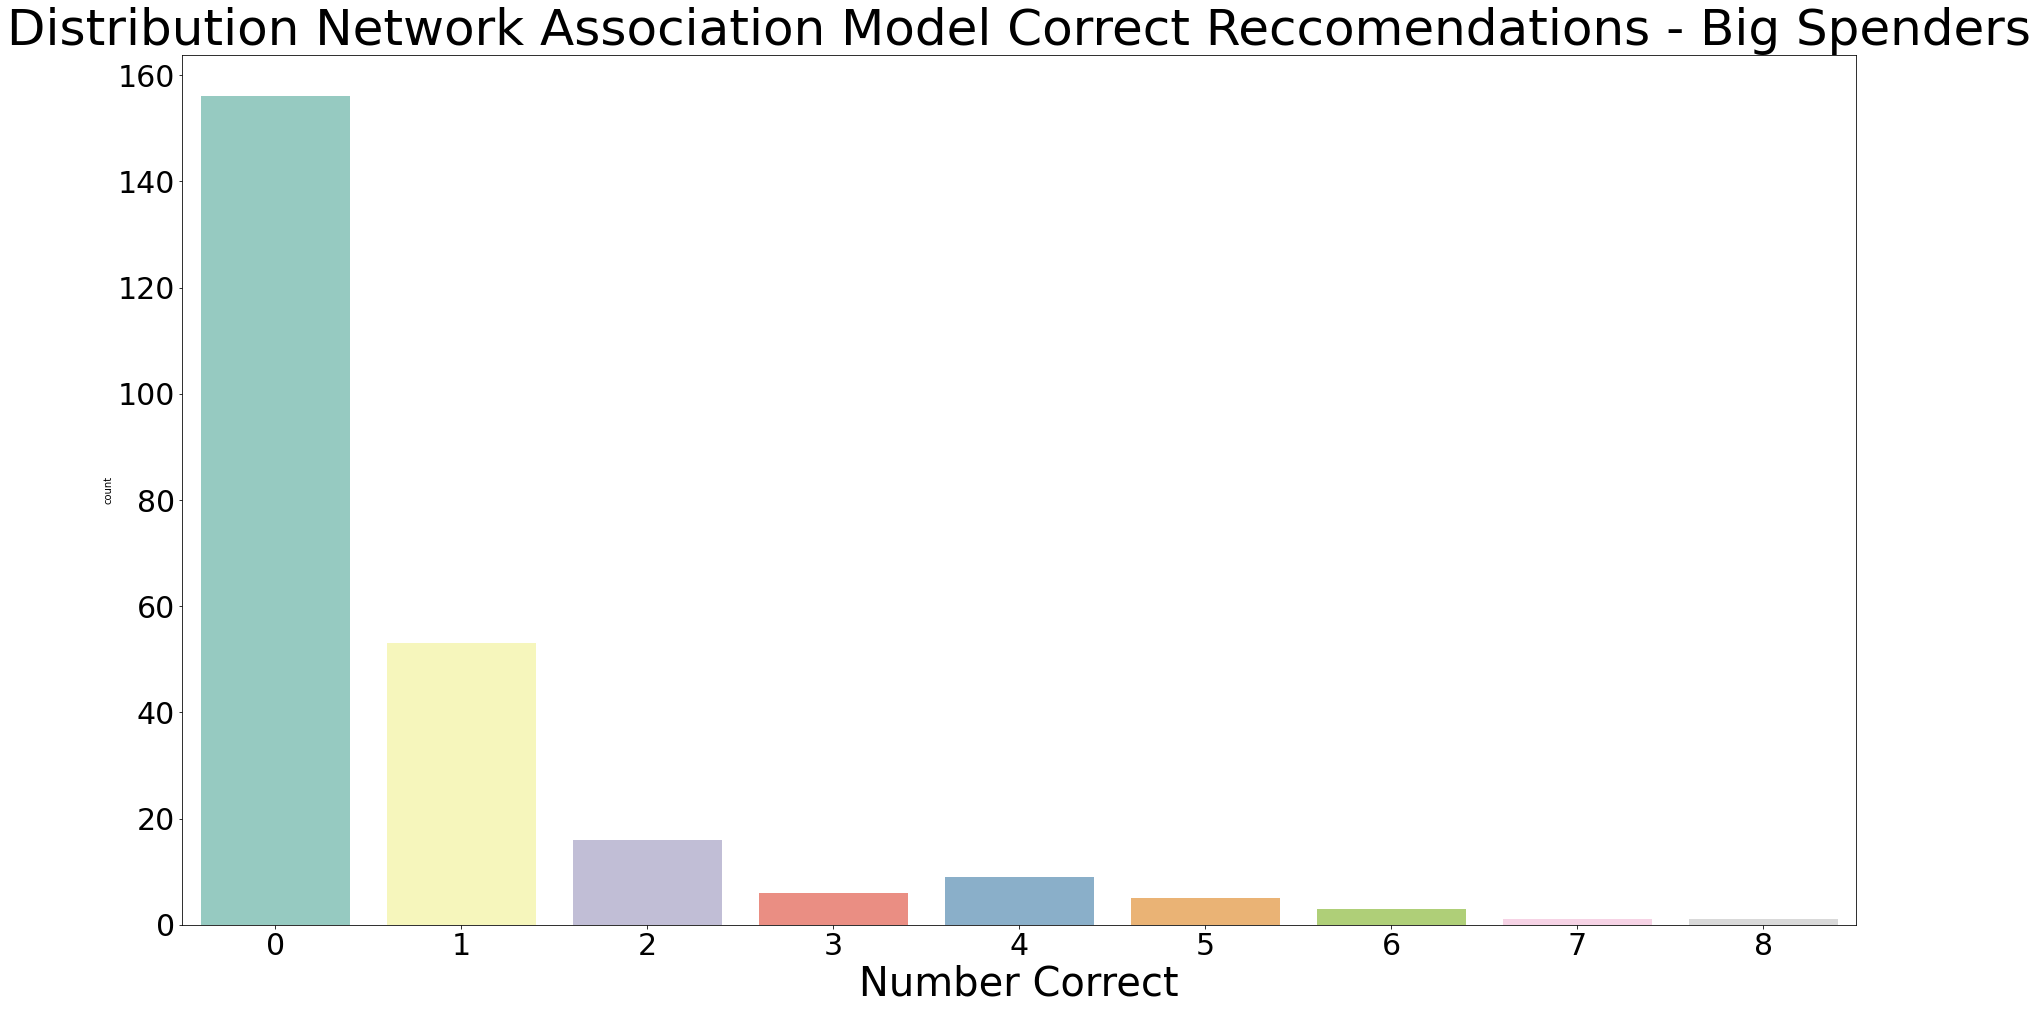

In [44]:

plt.figure(figsize=(30,16))

catcnt = sns.countplot(x="Accuracy", data=accurcies,palette="Set3")
catcnt.axes.set_title("Distribution Network Association Model Correct Reccomendations - Big Spenders",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)

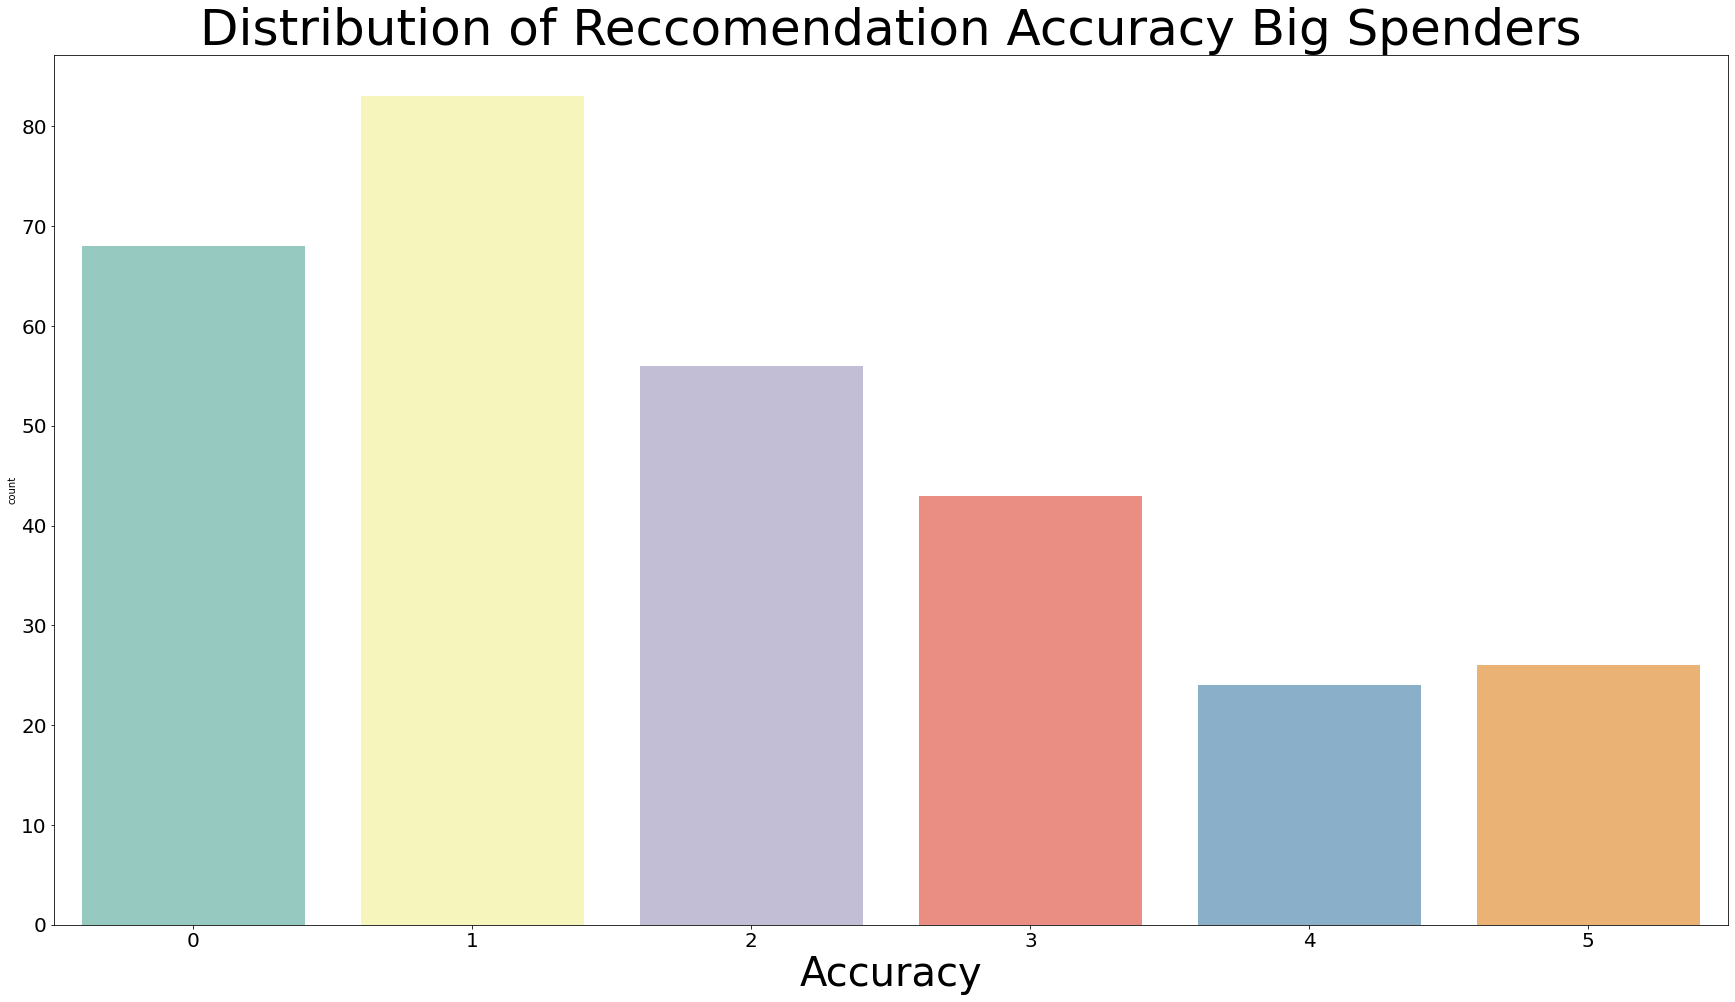

In [51]:

plt.figure(figsize=(30,16))

catcnt = sns.countplot(x="Accuracy", data=accurcies,palette="Set3")
catcnt.axes.set_title("Distribution of Reccomendation Accuracy Big Spenders",fontsize=50)
catcnt.set_xlabel("Accuracy",fontsize=40)
catcnt.tick_params(labelsize=20)

In [52]:
accurcies["Accuracy"].mean()

1.8333333333333333

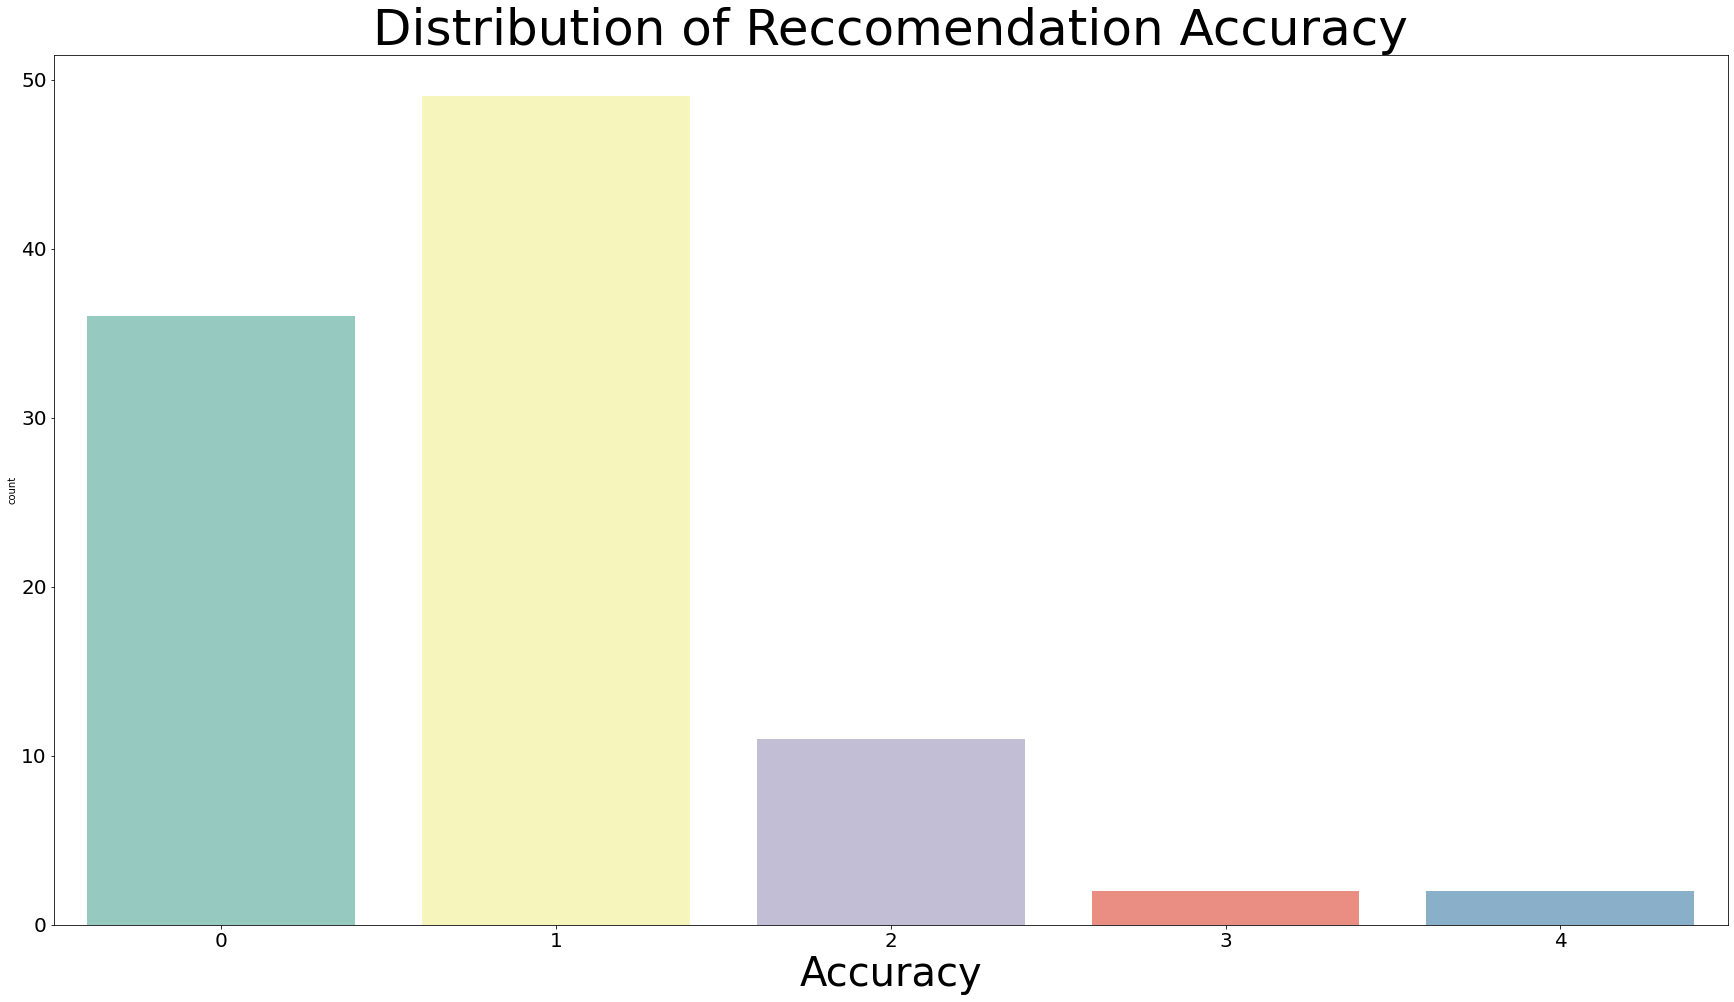

In [34]:
#dont do it !!!!!!!!!!!

#1/5 of the recommendation were correct

plt.figure(figsize=(30,16))
catcnt = sns.countplot(x="Accuracy", data=accurcies,palette="Set3")
catcnt.axes.set_title("Distribution of Reccomendation Accuracy",fontsize=50)
catcnt.set_xlabel("Accuracy",fontsize=40)
catcnt.tick_params(labelsize=20)

In [26]:
VPU[VPU.END_USER_ID == '91E9E26442E3A4E7B5488EBFDC26361D'].Vendor.tolist()[0]

['7A07BB33C6152690B88E290F6914F5A6',
 '5808D4F4E2ADE1859D788181D740F940',
 'D1BB02DB9ADF9B17723CD24E386D2A0A',
 'C806100AD2B61B06FE232468006BB818',
 '95E74678F58D7F04BA7ACA2FBCD36899',
 '537D0927BE83035D12B4F138B192A42D',
 'E11016BBE46D7FF112A2B4D2F34776D1',
 '11CA995A4746A5BB9A6C08B284DC8DA0',
 'F36F01EAE744B9E28ABF24659DC7DA79',
 '28A33BABD6D657A6925C60432600CC41',
 '493E9B4830E95D425AD2A271F801A9C0',
 '75882919BE4A82D5B5BDB1E89337F8D7',
 '48F9B31AE84FE972B37744983BA8CC85',
 '2139487FDFE1D470BBE9E3DAAD4E0B84',
 'A4190183C76E071BEE5E74B2629C637F',
 '63184ABE8B9DBEC9633451AB0AF82CD0',
 '5EA70470CC3BE29F101604DCD8BCBB58',
 '1DE7ED54EC516EF1A869D7C979626837',
 '9CB097CF7F1B88DC3DDC1E6D31DBE1E2',
 '712AE3DC969805D8BE3EFF33E7FFD2CB',
 '27D31D02914E99DA80E46A8BF1E2847D',
 'F2B45F8B98594E33145427891846FFD1',
 'E026842D4C0FF8FC2E9BAFC677A678C4',
 'F03022F90F791A438D9EFE63A8BBCBF9',
 '0C57785D8C42250848C40BF95EA6B0EB',
 '76327AEA150629712A2E721275ABB632',
 '9464654FF656ECFB51EBC546748FEE8E',
 

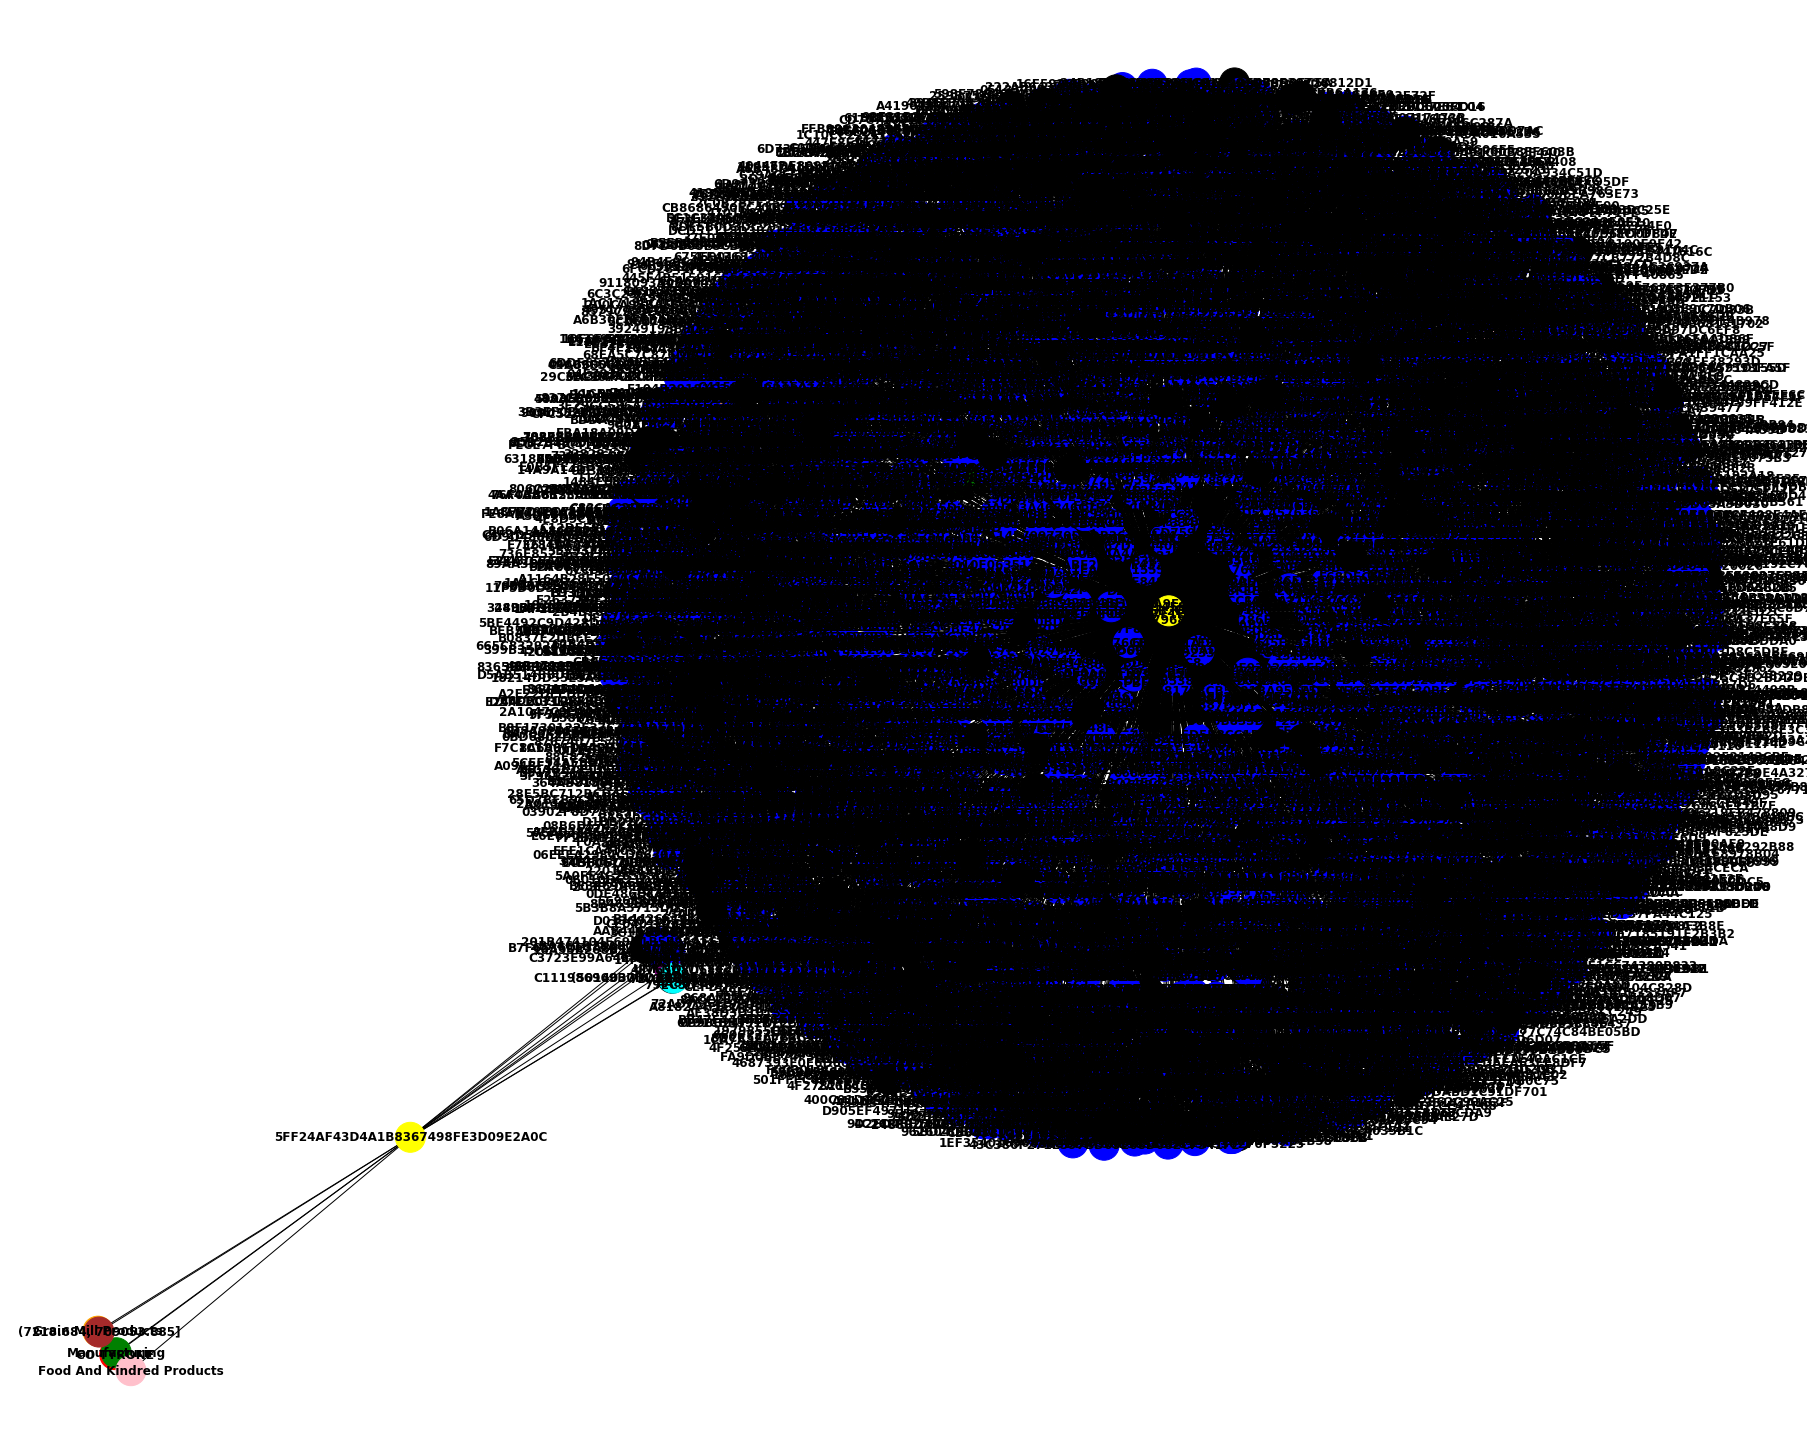

In [105]:
#plot network diagram by testing it with products to view similiarity patterns & what connects the two users together
#if cust in test set, we are assuming they didn't buy anything

list_in=["5FF24AF43D4A1B8367498FE3D09E2A0C",'289CEEF05EDEB05B2D6FB02D7C20B6D5']
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

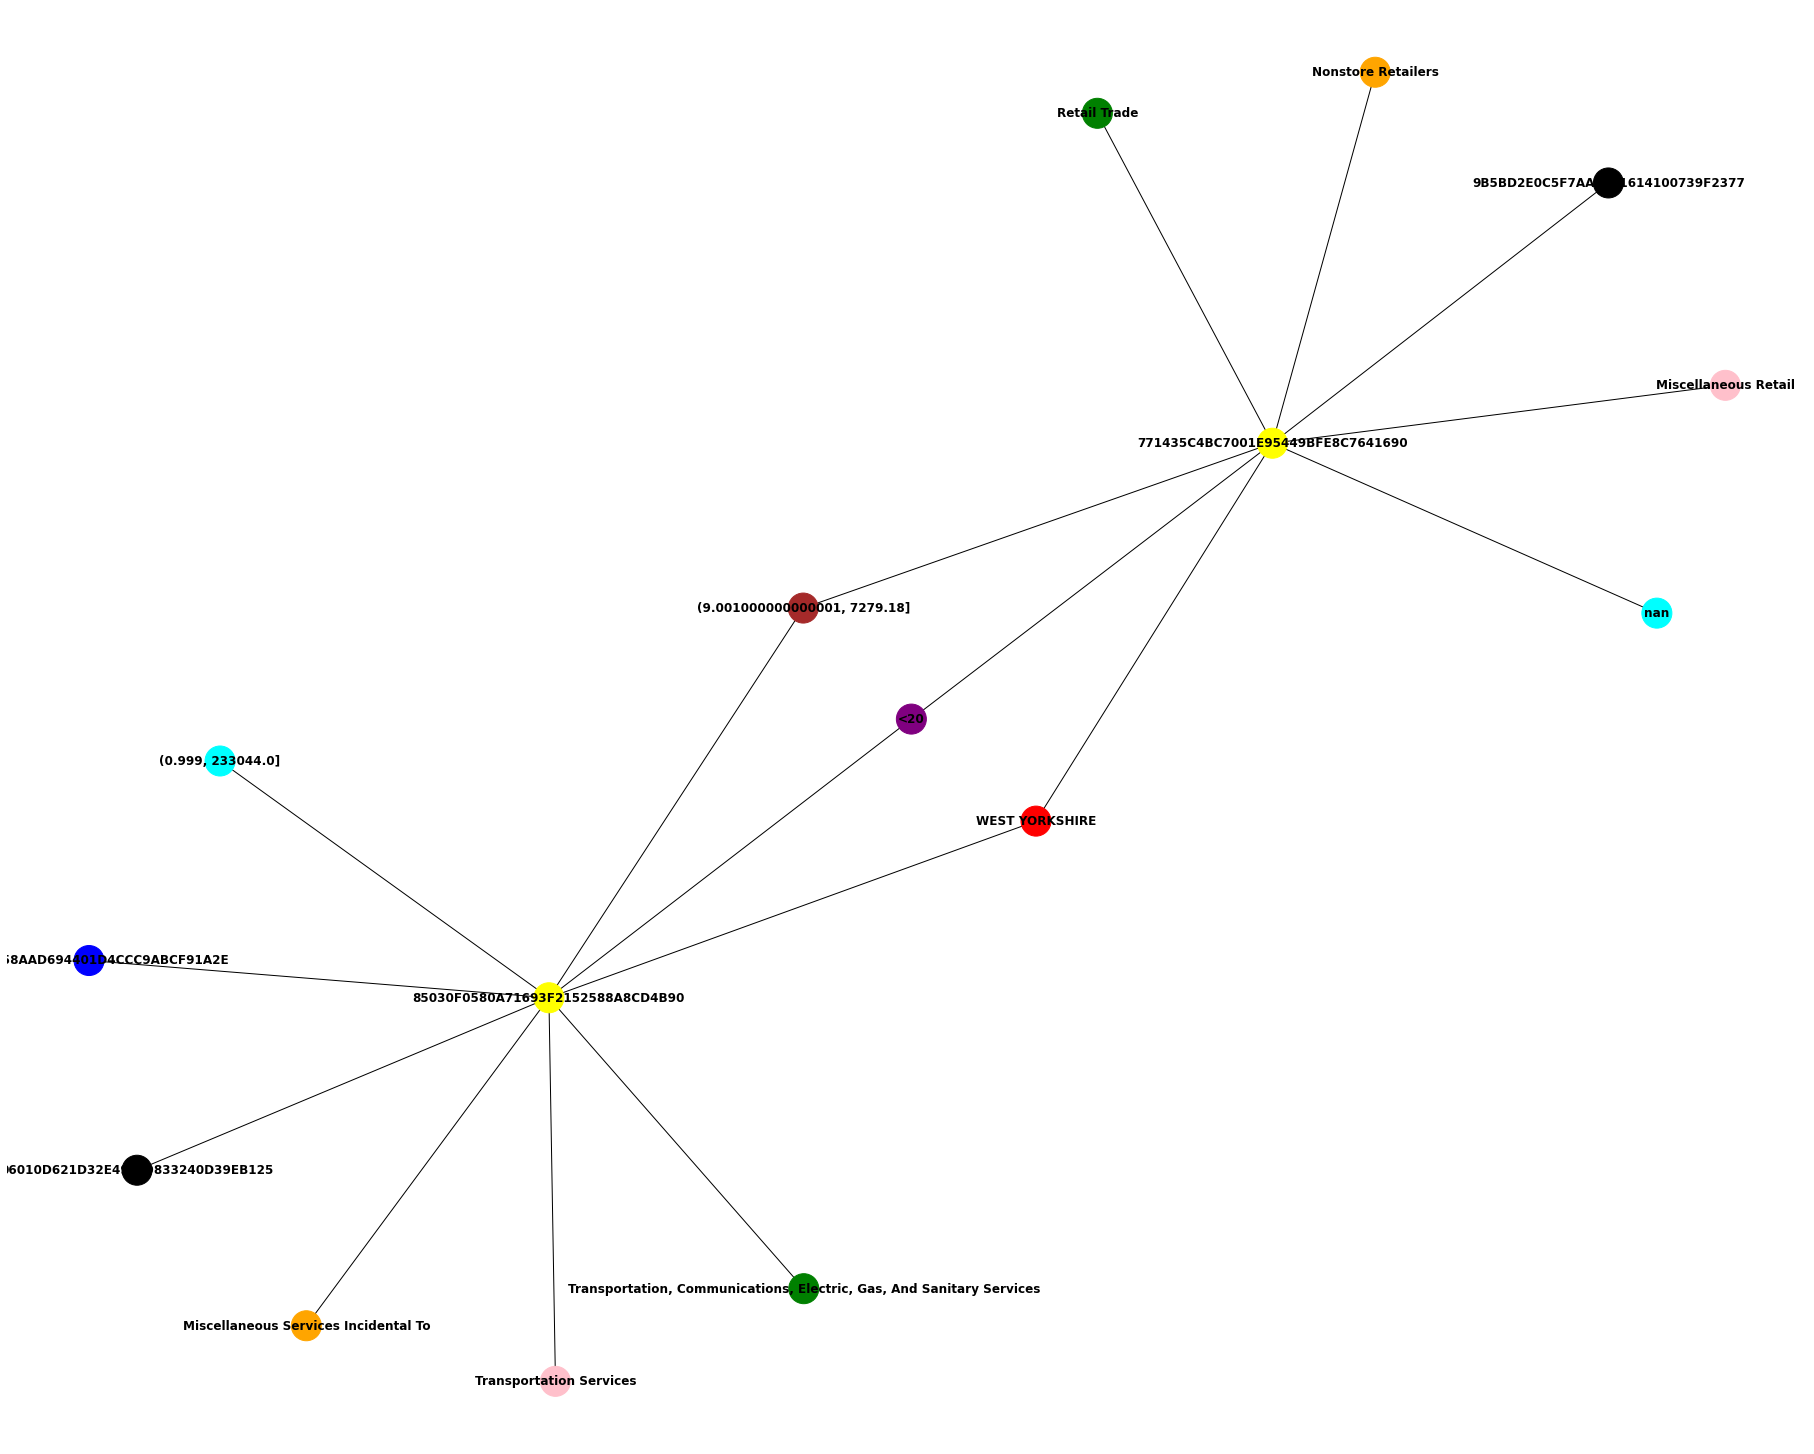

In [211]:
#plot another
list_in=["85030F0580A71693F2152588A8CD4B90","771435C4BC7001E95449BFE8C7641690"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [29]:
#look at customers that bought similiar products 
#get users 
#group by enduser
#add products that they bought: show one row per user 
#use EndUser and add everything we need to it: product id, total spent, vendor id, 

#get top 5 users, remove those items that they already bought, get accuracy
#if end user id in the list it will return products and remove all the current user bought already

#come up with rating system:



#replace products nodes that they prchased, replace with 0. Assume they didnt buy it before 

In [ ]:
1. sample
2. modify table
3. graph
4. compare results